In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the trained BPNet model
print("Loading the trained BPNet model...")
model = tf.keras.models.load_model('../results/model/bpnet_model.keras')
print("Model loaded successfully.")

# Define the one-hot encoding function
def one_hot_encode(sequence, max_len):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'a': 0, 'c': 1, 'g': 2, 't': 3}
    one_hot = np.zeros((max_len, 4), dtype=np.int8)
    for i, char in enumerate(sequence[:max_len]):
        if char in mapping:
            one_hot[i, mapping[char]] = 1
    return one_hot

# Load validation data
print("Loading validation data...")
X_val = np.load('../data/processed/X.npy', allow_pickle=True)  # Ensure to use the correct file path
print(f"Validation data loaded. Shape: {X_val.shape}")

# Determine the total number of sequences
total_sequences = X_val.shape[0]
print(f"Total number of sequences to be processed: {total_sequences}")

# Define the maximum sequence length
max_len = 18593

# One-hot encode validation data
print("One-hot encoding validation data...")
X_val_encoded = np.array([one_hot_encode(seq, max_len) for seq in X_val])
print(f"One-hot encoded validation data. Shape: {X_val_encoded.shape}")

# Define Integrated Gradients function compatible with TensorFlow 2.x
@tf.function
def compute_gradients(inputs, model):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        predictions = model(inputs)
    grads = tape.gradient(predictions, inputs)
    return grads

def integrated_gradients(inputs, baseline, model, steps=50):
    scaled_inputs = [baseline + (float(i) / steps) * (inputs - baseline) for i in range(steps + 1)]
    avg_grads = np.mean([compute_gradients(tf.convert_to_tensor(x, dtype=tf.float32), model).numpy() for x in scaled_inputs], axis=0)
    integrated_grads = (inputs - baseline) * avg_grads
    return integrated_grads

# Prepare baseline (zero array of same shape as input)
baseline = np.zeros((max_len, 4), dtype=np.float32)

# Compute attributions for all sequences and save them
all_attributions = []

start_time = time.time()

for seq_idx in range(total_sequences):
    input_sequence = X_val_encoded[seq_idx].astype(np.float32)  # Ensure dtype is float32
    input_sequence = np.expand_dims(input_sequence, axis=0)  # Add batch dimension
    attributions = integrated_gradients(input_sequence, baseline, model)
    all_attributions.append(attributions[0])
    
    if seq_idx % 100 == 0:  # Print status every 100 sequences
        elapsed_time = time.time() - start_time
        print(f"Processed {seq_idx+1} sequences out of {total_sequences} in {elapsed_time:.2f} seconds.")

total_time = time.time() - start_time
print(f"Total time taken to compute attributions for all sequences: {total_time:.2f} seconds")

# Convert attributions list to numpy array and save
all_attributions = np.array(all_attributions)
np.save('../results/attributions/attributions.npy', all_attributions)
print("Attributions saved successfully.")

# Example visualization for the first n sequences
n = 5  # Specify the number of sequences to visualize
for i in range(n):
    norm_attributions = all_attributions[i] / np.max(np.abs(all_attributions[i]))
    plt.figure(figsize=(10, 6))
    plt.plot(norm_attributions)  # Remove batch dimension for plotting
    plt.title(f'Integrated Gradients Attributions for Sequence {i + 1} (Normalized)')
    plt.xlabel('Position')
    plt.ylabel('Normalized Attribution Score')
    plt.xlim(0, 400)  # Zoom in
    plt.show()


Loading the trained BPNet model...
Model loaded successfully.
Loading validation data...
Validation data loaded. Shape: (57882,)
One-hot encoding validation data...
One-hot encoded validation data. Shape: (57882, 18593, 4)
Processed sequence 1 in 14.98 seconds.
Processed sequence 2 in 15.23 seconds.
Processed sequence 3 in 15.36 seconds.
Processed sequence 4 in 15.91 seconds.
Processed sequence 5 in 16.79 seconds.
Processed sequence 6 in 17.78 seconds.
Processed sequence 7 in 17.80 seconds.
Processed sequence 8 in 18.20 seconds.
Processed sequence 9 in 18.54 seconds.
Processed sequence 10 in 18.47 seconds.
Processed sequence 11 in 18.33 seconds.
Processed sequence 12 in 18.23 seconds.
Processed sequence 13 in 19.13 seconds.
Processed sequence 14 in 18.50 seconds.
Processed sequence 15 in 20.04 seconds.
Processed sequence 16 in 19.51 seconds.
Processed sequence 17 in 18.94 seconds.
Processed sequence 18 in 18.24 seconds.
Processed sequence 19 in 19.23 seconds.
Processed sequence 20 in 1

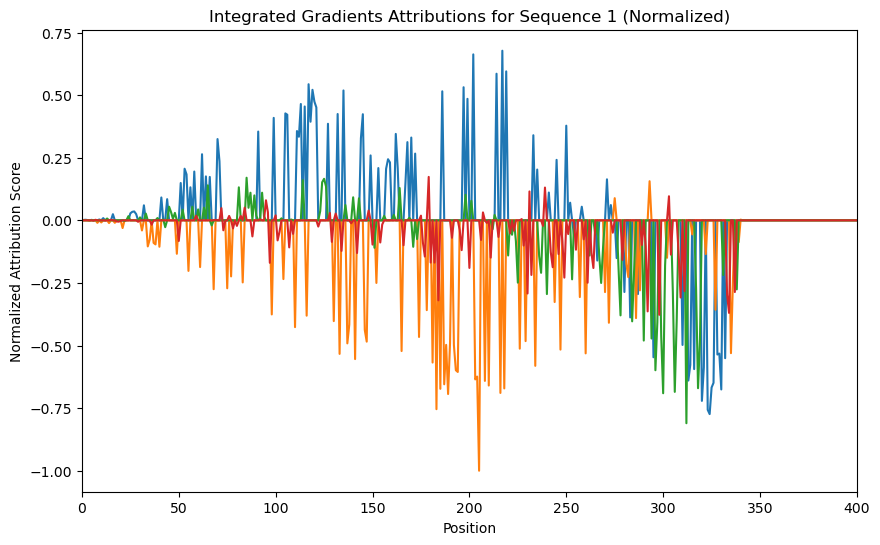

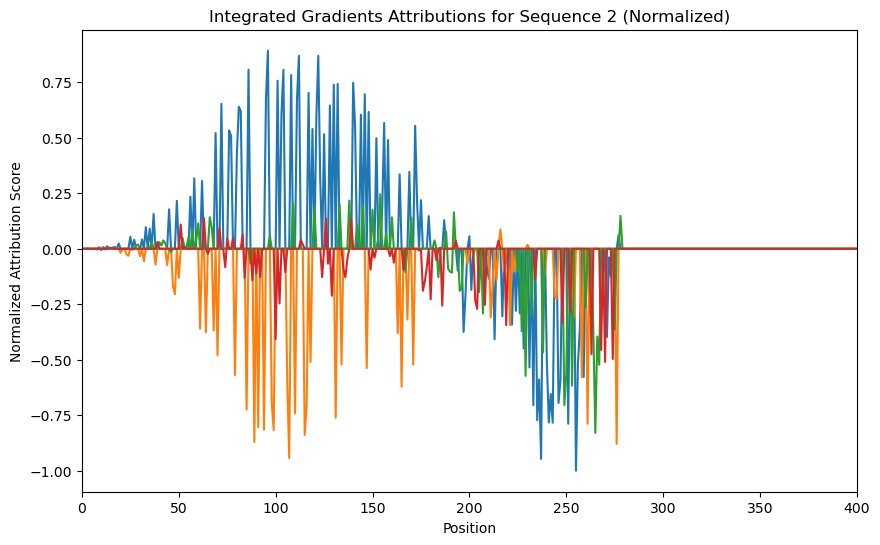

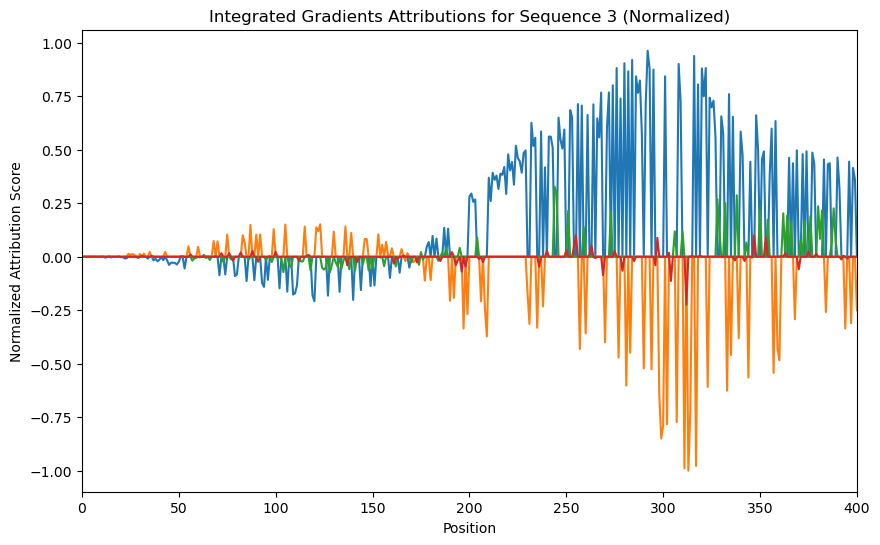

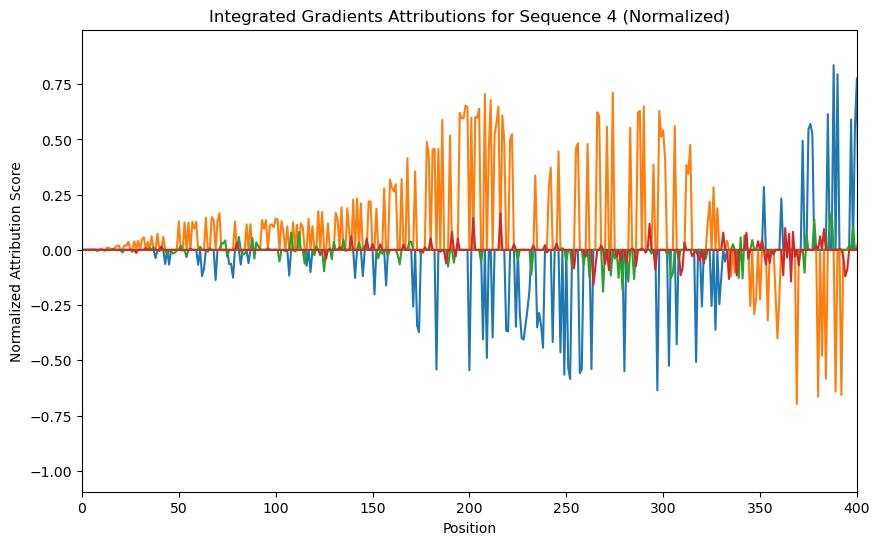

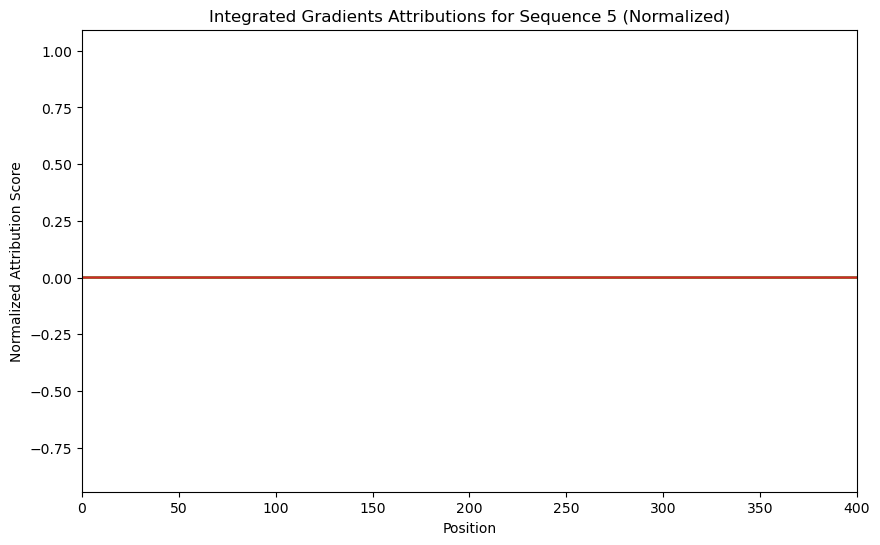

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the trained BPNet model
print("Loading the trained BPNet model...")
model = tf.keras.models.load_model('../results/model/bpnet_model.keras')
print("Model loaded successfully.")

# Define the one-hot encoding function
def one_hot_encode(sequence, max_len):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'a': 0, 'c': 1, 'g': 2, 't': 3}
    one_hot = np.zeros((max_len, 4), dtype=np.int8)
    for i, char in enumerate(sequence[:max_len]):
        if char in mapping:
            one_hot[i, mapping[char]] = 1
    return one_hot

# Load validation data
print("Loading validation data...")
X_val = np.load('../data/processed/X.npy', allow_pickle=True)  # Ensure to use the correct file path
print(f"Validation data loaded. Shape: {X_val.shape}")

# Define the maximum sequence length
max_len = 18593

# One-hot encode validation data
print("One-hot encoding validation data...")
X_val_encoded = np.array([one_hot_encode(seq, max_len) for seq in X_val])
print(f"One-hot encoded validation data. Shape: {X_val_encoded.shape}")

# Define Integrated Gradients function compatible with TensorFlow 2.x
@tf.function
def compute_gradients(inputs, model):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        predictions = model(inputs)
    grads = tape.gradient(predictions, inputs)
    return grads

def integrated_gradients(inputs, baseline, model, steps=50):
    scaled_inputs = [baseline + (float(i) / steps) * (inputs - baseline) for i in range(steps + 1)]
    avg_grads = np.mean([compute_gradients(tf.convert_to_tensor(x, dtype=tf.float32), model).numpy() for x in scaled_inputs], axis=0)
    integrated_grads = (inputs - baseline) * avg_grads
    return integrated_grads

# Prepare baseline (zero array of same shape as input)
baseline = np.zeros((max_len, 4), dtype=np.float32)

#roughly 15 seconds to process per sequence.  will take about 10 days
num_sequences_to_process = 100 

# Compute attributions for the specified number of sequences and save them
all_attributions = []

start_time = time.time()

for seq_idx in range(num_sequences_to_process):
    input_sequence = X_val_encoded[seq_idx].astype(np.float32)  # Ensure dtype is float32
    input_sequence = np.expand_dims(input_sequence, axis=0)  # Add batch dimension
    seq_start_time = time.time()
    attributions = integrated_gradients(input_sequence, baseline, model)
    all_attributions.append(attributions[0])
    
    if seq_idx % 1 == 0:  # Print status every 1 sequence
        elapsed_time = time.time() - seq_start_time
        print(f"Processed sequence {seq_idx+1} in {elapsed_time:.2f} seconds.")
        
total_time = time.time() - start_time
print(f"Total time taken to compute attributions for {num_sequences_to_process} sequences: {total_time:.2f} seconds")

# Convert attributions list to numpy array and save
all_attributions = np.array(all_attributions)
np.save('../results/attributions/attributions_subset.npy', all_attributions)
print("Attributions for the subset saved successfully.")

# Example visualization for the first n sequences
n = 5  # Specify the number of sequences to visualize
for i in range(n):
    norm_attributions = all_attributions[i] / np.max(np.abs(all_attributions[i]))
    plt.figure(figsize=(10, 6))
    plt.plot(norm_attributions)  # Remove batch dimension for plotting
    plt.title(f'Integrated Gradients Attributions for Sequence {i + 1} (Normalized)')
    plt.xlabel('Position')
    plt.ylabel('Normalized Attribution Score')
    plt.xlim(0, 400)  # Zoom in
    plt.show()


<Figure size 2000x400 with 0 Axes>

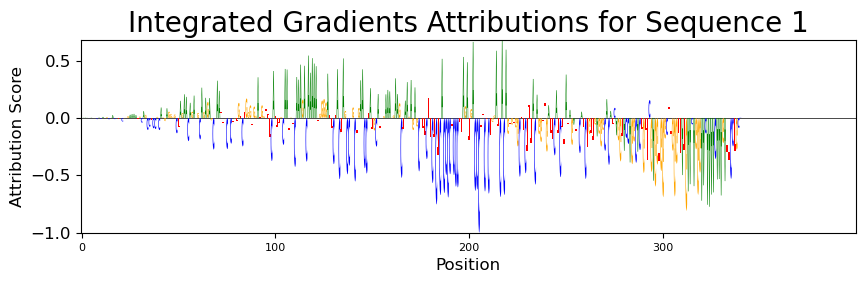

<Figure size 2000x400 with 0 Axes>

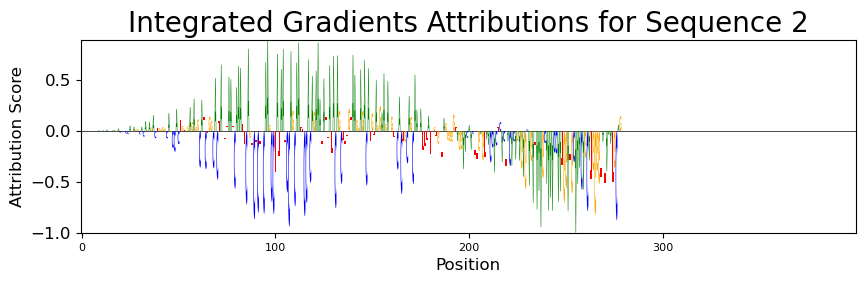

<Figure size 2000x400 with 0 Axes>

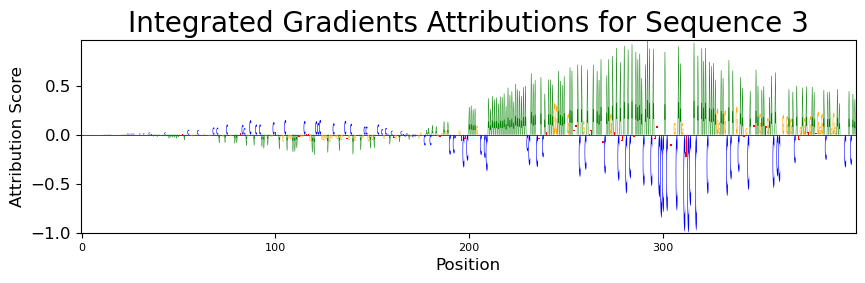

<Figure size 2000x400 with 0 Axes>

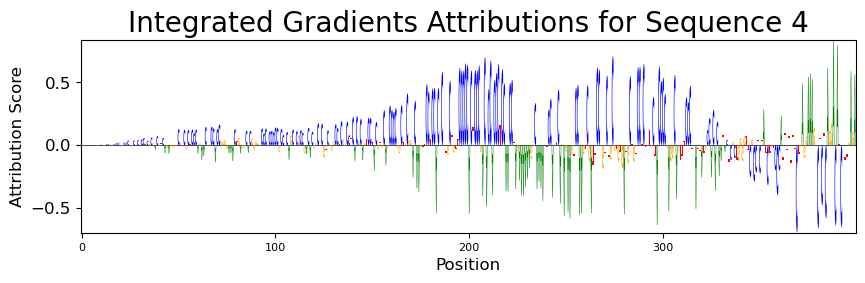

<Figure size 2000x400 with 0 Axes>

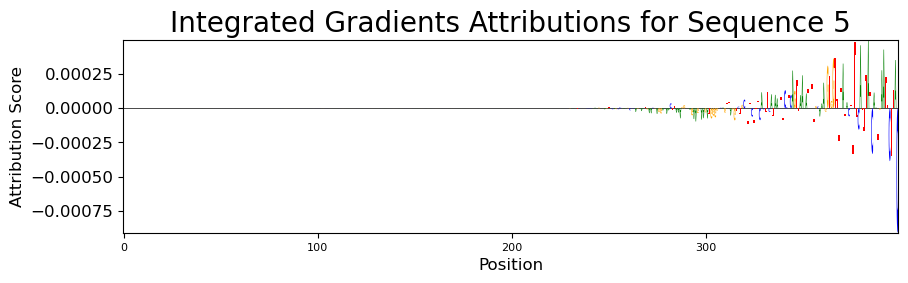

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logomaker
import pandas as pd

# Create a function to generate a sequence logo from attributions
def create_sequence_logo(attributions, seq_len):
    # Generate dataframe for logomaker
    logo_df = pd.DataFrame(attributions[:seq_len], columns=['A', 'C', 'G', 'T'])
    return logo_df

# Normalize attributions to span the entire length of the plot
def normalize_attributions(attributions):
    max_val = np.max(np.abs(attributions))
    if max_val != 0:
        return attributions / max_val
    else:
        return attributions

# Example visualization for the first n sequences using logomaker
n = 5  # Specify the number of sequences to visualize
plot_length = 400  # Adjust the plot length to ensure motifs span the entire plot
for i in range(n):
    normalized_attributions = normalize_attributions(all_attributions[i])
    logo_df = create_sequence_logo(normalized_attributions, plot_length)
    plt.figure(figsize=(20, 4))  # Increase the width for better visibility
    logomaker.Logo(logo_df, color_scheme='classic')
    plt.title(f'Integrated Gradients Attributions for Sequence {i + 1}', fontsize=20)
    plt.xlabel('Position', fontsize=12)
    plt.ylabel('Attribution Score', fontsize=12)
    plt.xticks(ticks=np.arange(0, plot_length, 100), fontsize=8)  # Adjust tick spacing and size
    plt.yticks(fontsize=12)
    plt.savefig(f'../results/attributions/logo_sequence_{i+1}.png', bbox_inches='tight')  # Save the figure
    plt.show()
